In [1]:
from onset_functions import *
import onset_widgets as w

# Choose spacecraft, sensor, viewing direction and particle species from the drop-down menu:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Set the data path and date range to load data:

In [47]:
# The path to where data is located / to be downloaded (by default the current directory)
data_path = f"{os.getcwd()}"

# Format of date: year, month, day
startdate = datetime.date(2021, 10, 9)
enddate = datetime.date(2021, 10, 10)

# Set the time range for the plot:
plot_range = ["2021-10-9 00:00", "2021-10-10 23:00"]

# Set the resampling period, or leave to None to not resample
# Resample should be a pandas-compatible string, e.g. '1h', '2min', '15s'
resample = "5min"

# Just run, don't edit:

In [41]:
# Get event data:
Event_class = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

solo_L2_epd-het-asun-rates_20211009_V01.cdf: 1.51MB [00:01, 1.41MB/s]           
solo_L2_epd-het-asun-rates_20211010_V01.cdf: 893kB [00:00, 1.04MB/s]            
solo_L2_epd-het-north-rates_20211009_V01.cdf: 1.54MB [00:01, 1.31MB/s]          
solo_L2_epd-het-north-rates_20211010_V01.cdf: 901kB [00:00, 1.25MB/s]           
solo_L2_epd-het-south-rates_20211009_V01.cdf: 1.52MB [00:01, 1.43MB/s]          
solo_L2_epd-het-south-rates_20211010_V01.cdf: 893kB [00:00, 1.23MB/s]           
solo_L2_epd-het-sun-rates_20211009_V01.cdf: 1.61MB [00:01, 1.43MB/s]            
solo_L2_epd-het-sun-rates_20211010_V01.cdf: 909kB [00:00, 997kB/s]              


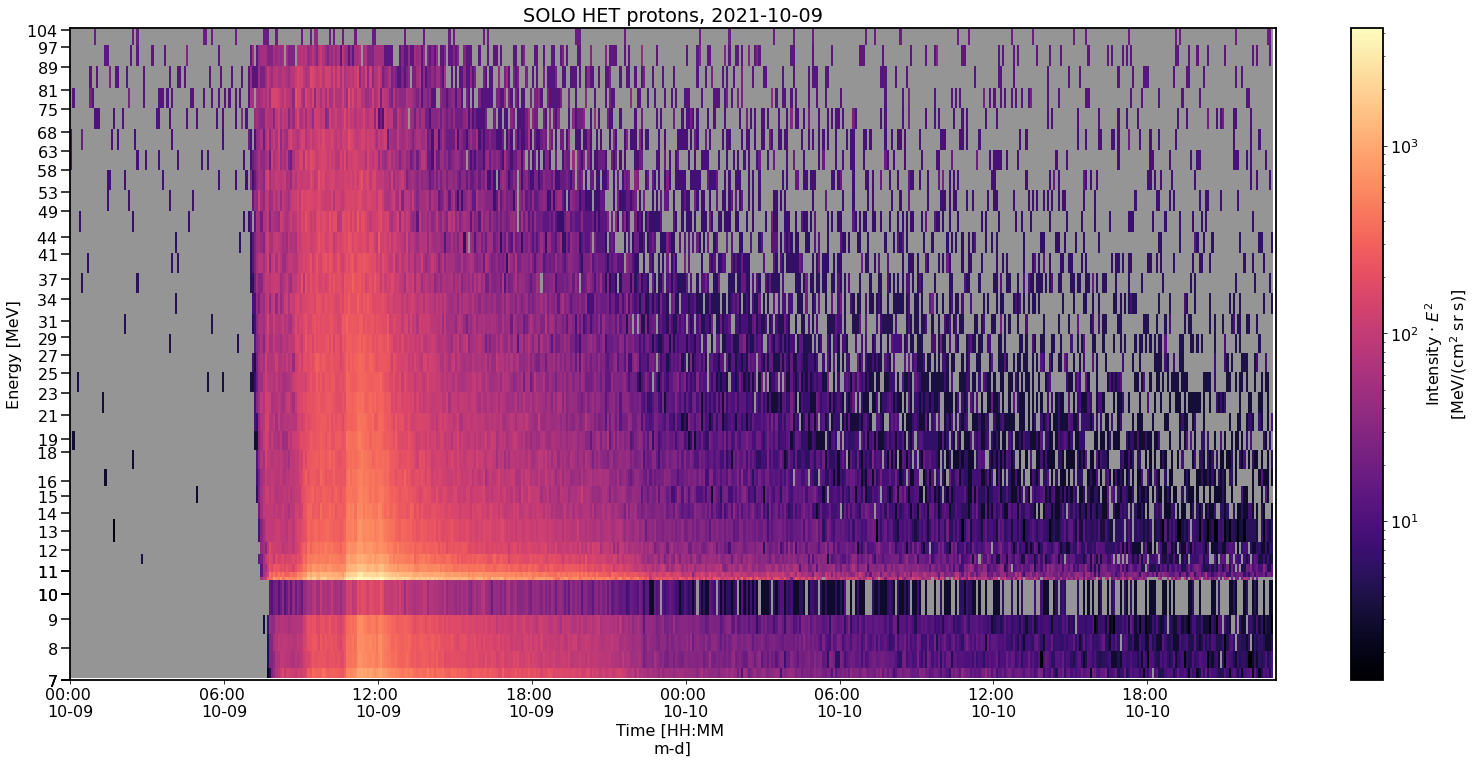

In [48]:
Event_class.dynamic_spectrum(w.view_drop.value, xlim=plot_range, resample=resample)

# Saving the plot

In [43]:
# Path to save the plots
plot_path = f"{os.getcwd()}"

# The pre-generated name for the file:
file_name = f"{plot_path}{os.sep}dynamic_spectrum_{w.spacecraft_drop.value}_{w.sensor_drop.value}_{w.species_drop.value}_{startdate.strftime('%Y%m%d')}.png"

# Or type your own file name here:
# file_name = ""

In [44]:
# Check that the name is correct
print(file_name)

/home/chospa/Documents/Github/tsa_ds/dynamic_spectrum_Solar Orbiter_HET_protons_20211009.png


In [16]:
# Save plot
Event_class.fig.savefig(file_name, facecolor="white", transparent=False)